<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/ALS_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(lubridate)
library(tidyverse)
library(survival)
install.packages('gtsummary')
library(gtsummary)
install.packages("tidycmprsk")
library(tidycmprsk)
devtools::install_github("zabore/condsurv") # author package
install.packages('condsurv')
library(condsurv)
install.packages("dplyr")
library(dplyr)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.5
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.5.1     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘reactR’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘cards’, ‘gt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cmprsk’, ‘hardhat’


Registered S3 method overwritten by 'tidycmpr


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp5fwa7p/remotes1175b416a3e/zabore-condsurv-e618590/DESCRIPTION’ ... OK
* preparing ‘condsurv’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘condsurv_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘condsurv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘condSURV’ ?”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
als_1 <- read_excel("/content/sample_data/ALS protocol Nov-11-2024 19-19-41.xlsx")

In [4]:
als_2 <- read_excel("/content/sample_data/ALS protocol Nov-16-2024 13-34-56.xlsx")

In [5]:
head(als_1)

id,Age,Sex,SN_C5_dextra,SN_C5_sinistra,SN_C6_dextra,SN_C6_sinistra,SN_C7_dextra,SN_C7_sinistra,MN1_dextra,⋯,UN2_sinistra,UN3_dextra,UN3_sinistra,Ish_dextra,Ish_sinistra,TN_dextra,TN_sinistra,PN_dextra,PN_sinistra,Diagnosis
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Kennnedy_1,60,male,3,5,7,9,4,7,6,⋯,8,5,5,28,35,19,16,6,7,1
Kennedy_2,45,male,NA,NA,NA,NA,NA,NA,7,⋯,4,6,6,29,40,28,26,6,7,1
Kennedy_3,48,male,5,6,10,8,10,8,7,⋯,7,7,7,58,56,33,32,7,10,1
ALS_1,30,male,6,7,9,10,8,11,6,⋯,6,6,8,43,47,31,25,15,14,1
ALS_2,38,male,4,4,8,8,11,11,9,⋯,6,8,5,49,43,17,18,10,10,1
ALS_3,55,female,9,8,7,7,6,5,10,⋯,10,6,12,44,40,17,23,11,14,1


In [6]:
head(als_2)

id,Age,Sex,SN_C5_dextra,SN_C5_sinistra,SN_C6_dextra,SN_C6_sinistra,SN_C7_dextra,SN_C7_sinistra,MN1_dextra,⋯,UN2_sinistra,UN3_dextra,UN3_sinistra,Ish_dextra,Ish_sinistra,TN_dextra,TN_sinistra,PN_dextra,PN_sinistra,Diagnosis
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Control_6,55,male,5,NA,5,5,NA,7,6,⋯,7.00,15,9,NA,NA,NA,NA,NA,NA,0
Control_7,29,male,9,12,11,8,6,5,12,⋯,10.00,12,12,43,48,35,32,16,16,0
ALS_23,52,male,12,7,13,13,11,13,9,⋯,7.00,9,9,55,64,24,34,14,15,1
ALS_24,18,male,8,12,9,5,6,10,5,⋯,6.15,4,4,34,34,17,16,14,14,1
Control_8,29,male,9,12,11,8,6,5,12,⋯,10.00,12,12,43,48,35,32,16,16,0
Control_9,50,female,7,11,12,10,12,8,14,⋯,10.00,6,7,NA,NA,NA,NA,NA,NA,0


In [7]:
dim(als_1)

[1] 30 28

In [8]:
dim(als_2)

[1] 17 28

In [9]:
als <- rbind(als_1, als_2)

In [10]:
head(als)

id,Age,Sex,SN_C5_dextra,SN_C5_sinistra,SN_C6_dextra,SN_C6_sinistra,SN_C7_dextra,SN_C7_sinistra,MN1_dextra,⋯,UN2_sinistra,UN3_dextra,UN3_sinistra,Ish_dextra,Ish_sinistra,TN_dextra,TN_sinistra,PN_dextra,PN_sinistra,Diagnosis
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Kennnedy_1,60,male,3,5,7,9,4,7,6,⋯,8,5,5,28,35,19,16,6,7,1
Kennedy_2,45,male,NA,NA,NA,NA,NA,NA,7,⋯,4,6,6,29,40,28,26,6,7,1
Kennedy_3,48,male,5,6,10,8,10,8,7,⋯,7,7,7,58,56,33,32,7,10,1
ALS_1,30,male,6,7,9,10,8,11,6,⋯,6,6,8,43,47,31,25,15,14,1
ALS_2,38,male,4,4,8,8,11,11,9,⋯,6,8,5,49,43,17,18,10,10,1
ALS_3,55,female,9,8,7,7,6,5,10,⋯,10,6,12,44,40,17,23,11,14,1


In [11]:
dim(als)

[1] 47 28

In [12]:
str(als)

tibble [47 × 28] (S3: tbl_df/tbl/data.frame)
 $ id            : chr [1:47] "Kennnedy_1" "Kennedy_2" "Kennedy_3" "ALS_1" ...
 $ Age           : num [1:47] 60 45 48 30 38 55 57 63 73 76 ...
 $ Sex           : chr [1:47] "male" "male" "male" "male" ...
 $ SN_C5_dextra  : num [1:47] 3 NA 5 6 4 9 8 7 6 6 ...
 $ SN_C5_sinistra: num [1:47] 5 NA 6 7 4 8 9 9 6 6 ...
 $ SN_C6_dextra  : num [1:47] 7 NA 10 9 8 7 7 8 7 7 ...
 $ SN_C6_sinistra: num [1:47] 9 NA 8 10 8 7 7 6 4 7 ...
 $ SN_C7_dextra  : num [1:47] 4 NA 10 8 11 6 4 8 5 8 ...
 $ SN_C7_sinistra: num [1:47] 7 NA 8 11 11 5 6 7 7 10 ...
 $ MN1_dextra    : num [1:47] 6 7 7 6 9 10 8 6 9 10 ...
 $ MN1_sinistra  : num [1:47] 6 7 8 7 7 12 10 8 9 11 ...
 $ MN2_dextra    : num [1:47] 8 8 8 5 7 9 5 6 6 15 ...
 $ MN2_sinistra  : num [1:47] 6 8 7 6 14 15 12 9 8 12 ...
 $ MN3_dextra    : num [1:47] 5 7 8 10 10 6 7 9 10 12 ...
 $ MN3_sinistra  : num [1:47] 5 7 9 11 14 5 6 10 12 7 ...
 $ UN1_dextra    : num [1:47] 4 6 6 6 4 7 7 11 9 7 ...
 $ UN1_sinistra 

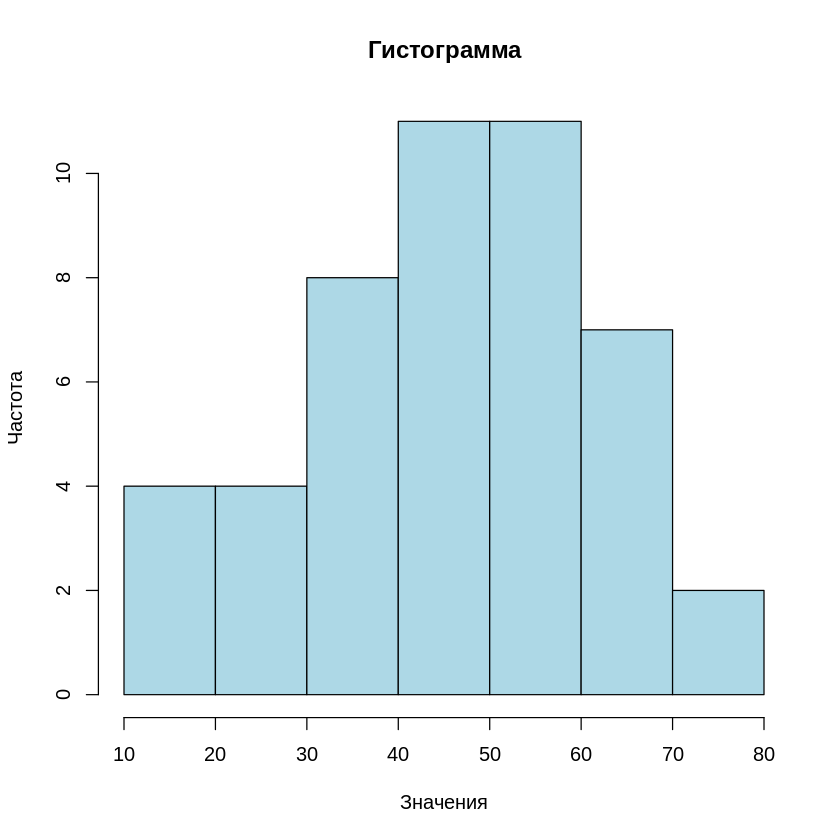

In [57]:
hist(als$Age, main = "Гистограмма", xlab = "Значения", ylab = "Частота", col = "lightblue")

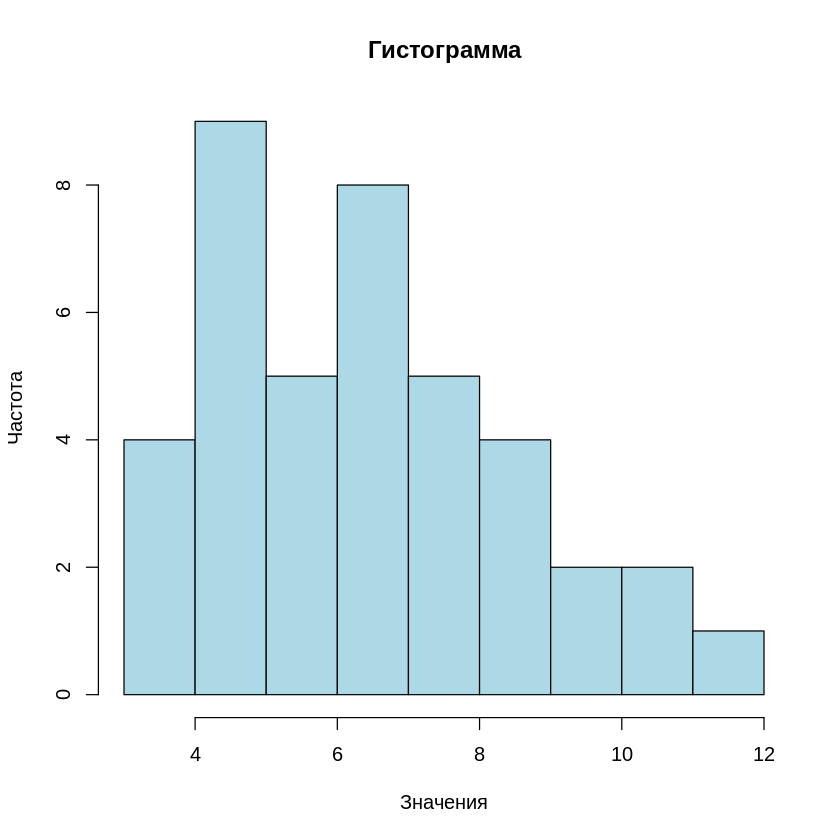

In [58]:
hist(als$SN_C5_dextra, main = "Гистограмма", xlab = "Значения", ylab = "Частота", col = "lightblue")

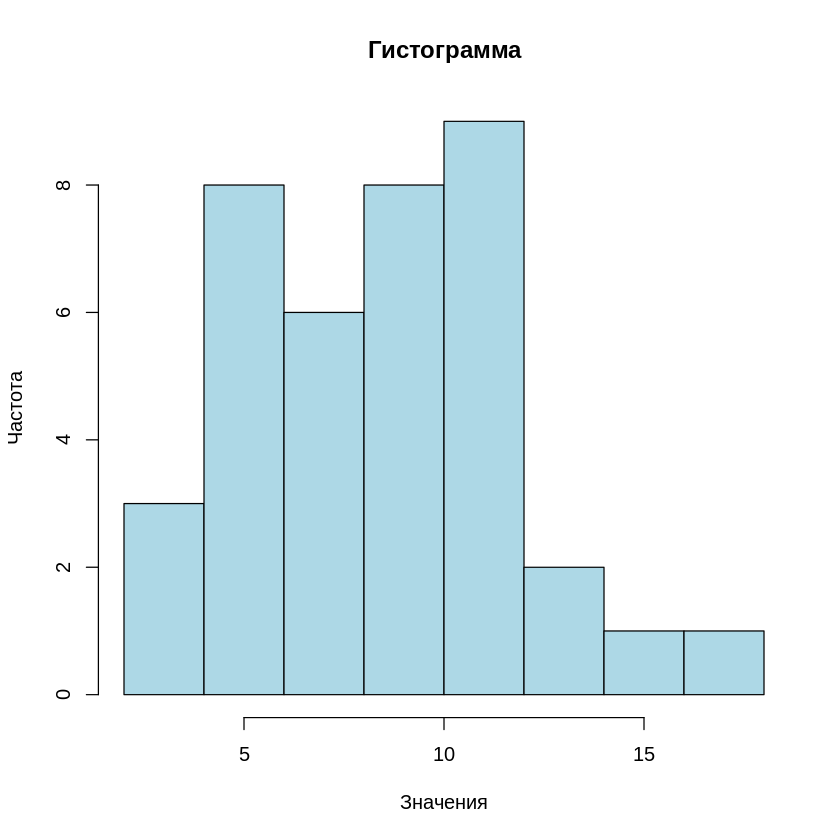

In [59]:
hist(als$SN_C7_dextra, main = "Гистограмма", xlab = "Значения", ylab = "Частота", col = "lightblue")

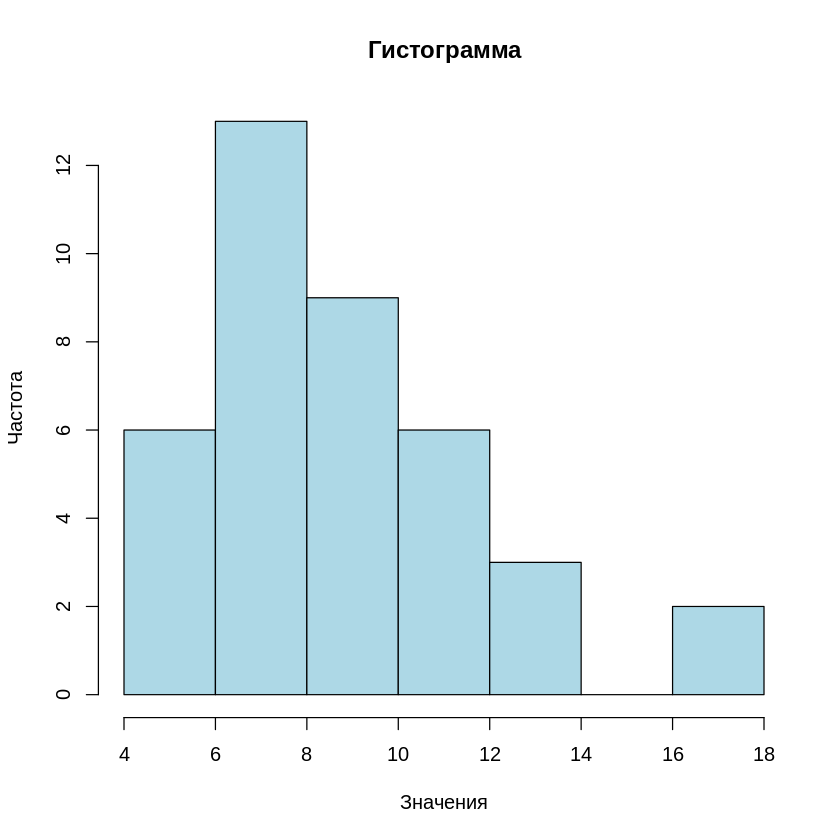

In [60]:
hist(als$SN_C7_sinistra, main = "Гистограмма", xlab = "Значения", ylab = "Частота", col = "lightblue")

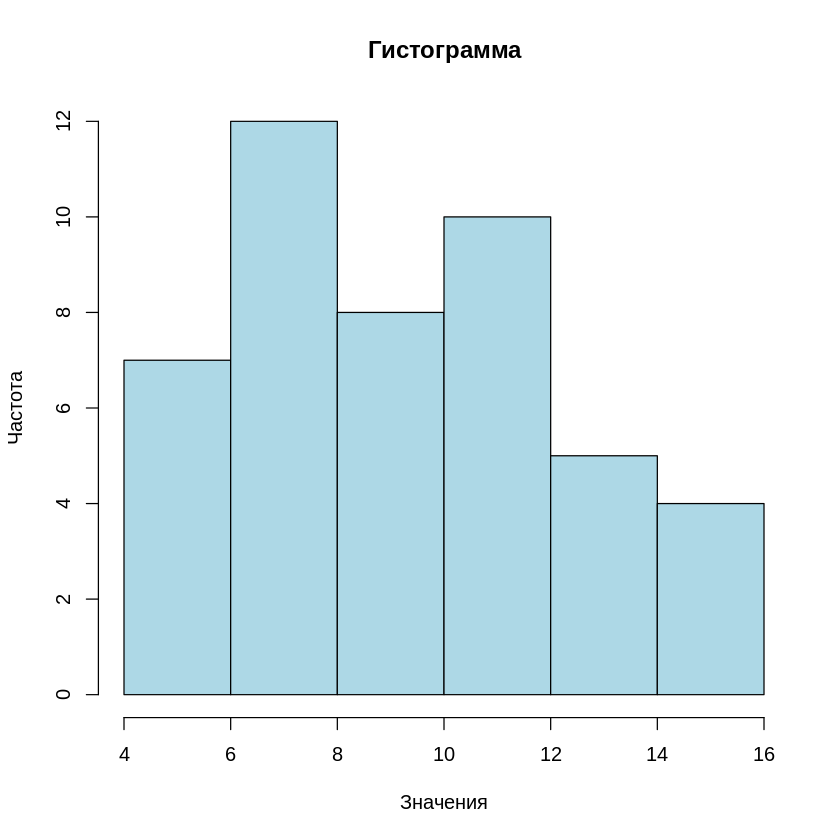

In [61]:
hist(als$MN3_dextra, main = "Гистограмма", xlab = "Значения", ylab = "Частота", col = "lightblue")

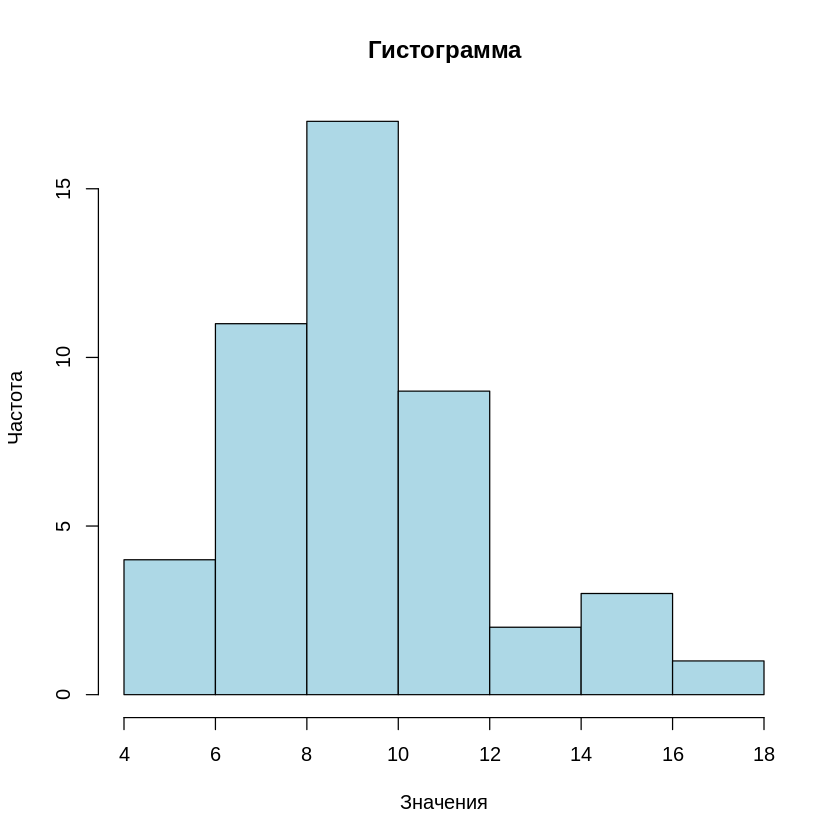

In [62]:
hist(als$MN3_sinistra, main = "Гистограмма", xlab = "Значения", ylab = "Частота", col = "lightblue")

In [63]:
library(dplyr)

In [64]:
als <- als %>%
  mutate(Diagnosis = as.factor(Diagnosis))

In [65]:
str(als)

tibble [47 × 28] (S3: tbl_df/tbl/data.frame)
 $ id            : chr [1:47] "Kennnedy_1" "Kennedy_2" "Kennedy_3" "ALS_1" ...
 $ Age           : num [1:47] 60 45 48 30 38 55 57 63 73 76 ...
 $ Sex           : chr [1:47] "male" "male" "male" "male" ...
 $ SN_C5_dextra  : num [1:47] 3 NA 5 6 4 9 8 7 6 6 ...
 $ SN_C5_sinistra: num [1:47] 5 NA 6 7 4 8 9 9 6 6 ...
 $ SN_C6_dextra  : num [1:47] 7 NA 10 9 8 7 7 8 7 7 ...
 $ SN_C6_sinistra: num [1:47] 9 NA 8 10 8 7 7 6 4 7 ...
 $ SN_C7_dextra  : num [1:47] 4 NA 10 8 11 6 4 8 5 8 ...
 $ SN_C7_sinistra: num [1:47] 7 NA 8 11 11 5 6 7 7 10 ...
 $ MN1_dextra    : num [1:47] 6 7 7 6 9 10 8 6 9 10 ...
 $ MN1_sinistra  : num [1:47] 6 7 8 7 7 12 10 8 9 11 ...
 $ MN2_dextra    : num [1:47] 8 8 8 5 7 9 5 6 6 15 ...
 $ MN2_sinistra  : num [1:47] 6 8 7 6 14 15 12 9 8 12 ...
 $ MN3_dextra    : num [1:47] 5 7 8 10 10 6 7 9 10 12 ...
 $ MN3_sinistra  : num [1:47] 5 7 9 11 14 5 6 10 12 7 ...
 $ UN1_dextra    : num [1:47] 4 6 6 6 4 7 7 11 9 7 ...
 $ UN1_sinistra 

In [13]:
independent_vars <- c("SN_C5_dextra", "SN_C5_sinistra", "SN_C6_dextra", "SN_C6_sinistra",
                      "SN_C7_dextra", "SN_C7_sinistra", "MN1_dextra", "MN1_sinistra",
                      "MN2_dextra", "MN2_sinistra", "MN3_dextra", "MN3_sinistra",
                      "UN1_dextra", "UN1_sinistra", "UN2_dextra", "UN2_sinistra",
                      "UN3_dextra", "UN3_sinistra")
shapiro_results <- lapply(independent_vars, function(var) {
  shapiro.test(als[[var]])
})

In [14]:
shapiro_results

[[1]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.95583, p-value = 0.1204


[[2]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.93119, p-value = 0.02188


[[3]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.94797, p-value = 0.04627


[[4]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.94375, p-value = 0.03537


[[5]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.95781, p-value = 0.161


[[6]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.91841, p-value = 0.007769


[[7]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.92432, p-value = 0.004738


[[8]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.96153, p-value = 0.1237


[[9]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.9258, p-value = 0.005348


[[10]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.9392, p-value = 0.0201


[[11]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.94249, p-value = 0.02426


[[12]]

	Shapiro-Wilk normality te

In [15]:
independent_vars <- c("SN_C5_dextra", "SN_C5_sinistra", "SN_C6_dextra", "SN_C6_sinistra",
                      "SN_C7_dextra", "SN_C7_sinistra", "MN1_dextra", "MN1_sinistra",
                      "MN2_dextra", "MN2_sinistra", "MN3_dextra", "MN3_sinistra",
                      "UN1_dextra", "UN1_sinistra", "UN2_dextra", "UN2_sinistra",
                      "UN3_dextra", "UN3_sinistra")

In [16]:
# Создание списка для хранения результатов t-теста
t_test_results <- lapply(independent_vars, function(var) {
  # Группы по Diagnosis
  group_0 <- als[[var]][als$Diagnosis == 0]
  group_1 <- als[[var]][als$Diagnosis == 1]

  # Проведение t-теста
  t_test_result <- t.test(group_0, group_1, var.equal = TRUE) # var.equal = TRUE для равенства дисперсий
  return(list(
    variable = var,
    t_statistic = t_test_result$statistic,
    p_value = t_test_result$p.value,
    mean_group_0 = mean(group_0, na.rm = TRUE),
    mean_group_1 = mean(group_1, na.rm = TRUE)
  ))
})

In [17]:
# Преобразование результатов в читаемый формат
t_test_results_df <- do.call(rbind, lapply(t_test_results, as.data.frame))
print(t_test_results_df)

          variable t_statistic    p_value mean_group_0 mean_group_1
t     SN_C5_dextra  0.29124119 0.77245073     7.000000     6.800000
t1  SN_C5_sinistra  0.23971252 0.81191279     7.421053     7.210526
t2    SN_C6_dextra -0.79557461 0.43075286     8.200000     8.875000
t3  SN_C6_sinistra -0.74843398 0.45847052     7.750000     8.304348
t4    SN_C7_dextra -1.12118727 0.26963162     8.470588     9.666667
t5  SN_C7_sinistra -1.85972015 0.07089008     8.111111     9.904762
t6      MN1_dextra  0.50542298 0.61572852     8.900000     8.518519
t7    MN1_sinistra -0.74932770 0.45755916     8.600000     9.296296
t8      MN2_dextra -0.65313491 0.51699261     8.500000     9.000000
t9    MN2_sinistra -0.50916470 0.61323981     8.450000     8.840000
t10     MN3_dextra  2.55755750 0.01406331    10.950000     8.807692
t11   MN3_sinistra  2.01515821 0.04988515    10.750000     9.074074
t12     UN1_dextra  1.49591003 0.14215419     7.100000     6.083333
t13   UN1_sinistra  1.08860334 0.28253613     6.

In [68]:
# Среднее для группы с Diagnosis = 1
mean_SN_C7_sinistra_group_1 <- mean(als$SN_C7_sinistra[als$Diagnosis == 1], na.rm = TRUE)

# Среднее для группы с Diagnosis = 0
mean_SN_C7_sinistra_group_0 <- mean(als$SN_C7_sinistra[als$Diagnosis == 0], na.rm = TRUE)

# Вывод результатов
mean_SN_C7_sinistra_group_1
mean_SN_C7_sinistra_group_0

[1] 9.904762

[1] 8.111111

In [100]:
mean(als$SN_C7_dextra[als$Diagnosis == 1],na.rm = TRUE)

[1] 9.666667

In [101]:
sd(als$SN_C7_dextra[als$Diagnosis == 1],na.rm = TRUE)

[1] 3.772709

In [102]:
mean(als$SN_C7_sinistra[als$Diagnosis == 1],na.rm = TRUE)

[1] 9.904762

In [103]:
sd(als$SN_C7_sinistra[als$Diagnosis == 1],na.rm = TRUE)

[1] 3.576378

In [104]:
mean(als$SN_C7_dextra[als$Diagnosis == 0],na.rm = TRUE)

[1] 8.470588

In [105]:
sd(als$SN_C7_dextra[als$Diagnosis == 0],na.rm = TRUE)

[1] 2.502939

In [106]:
mean(als$SN_C7_sinistra[als$Diagnosis == 0],na.rm = TRUE)

[1] 8.111111

In [107]:
sd(als$SN_C7_sinistra[als$Diagnosis == 0],na.rm = TRUE)

[1] 2.138963

In [69]:
# Стандартное отклонение группы с Diagnosis = 0
sd_SN_C7_sinistra_group_1 <- sd(als$SN_C7_sinistra[als$Diagnosis == 1], na.rm = TRUE)

# Среднее для группы с Diagnosis = 0
sd_SN_C7_sinistra_group_0 <- sd(als$SN_C7_sinistra[als$Diagnosis == 0], na.rm = TRUE)

# Вывод результатов
sd_SN_C7_sinistra_group_1
sd_SN_C7_sinistra_group_0

[1] 3.576378

[1] 2.138963

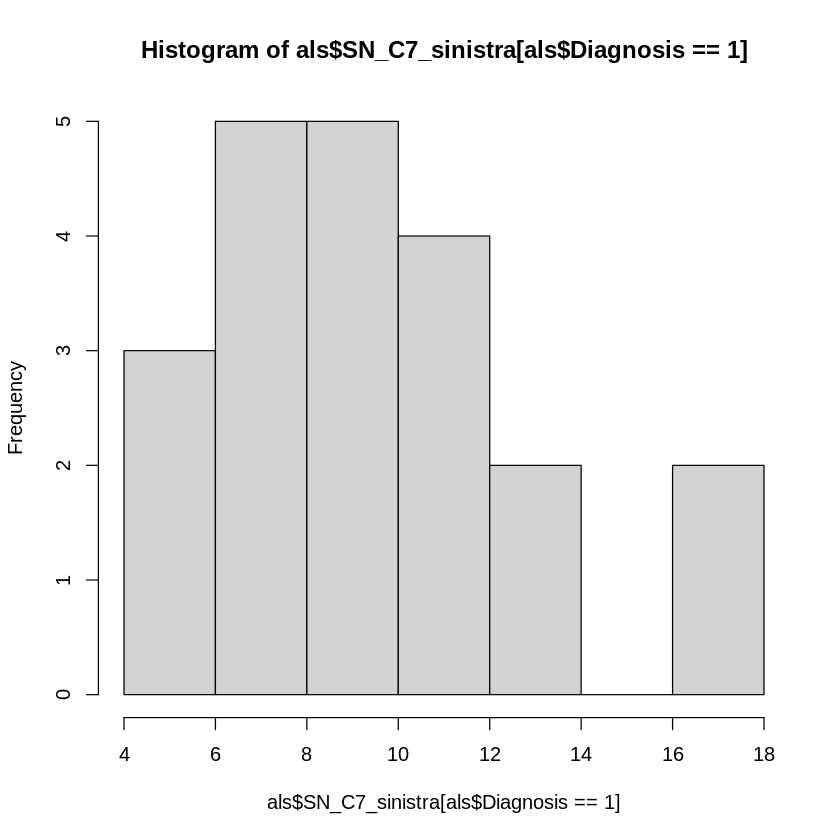

In [70]:
hist(als$SN_C7_sinistra[als$Diagnosis == 1])

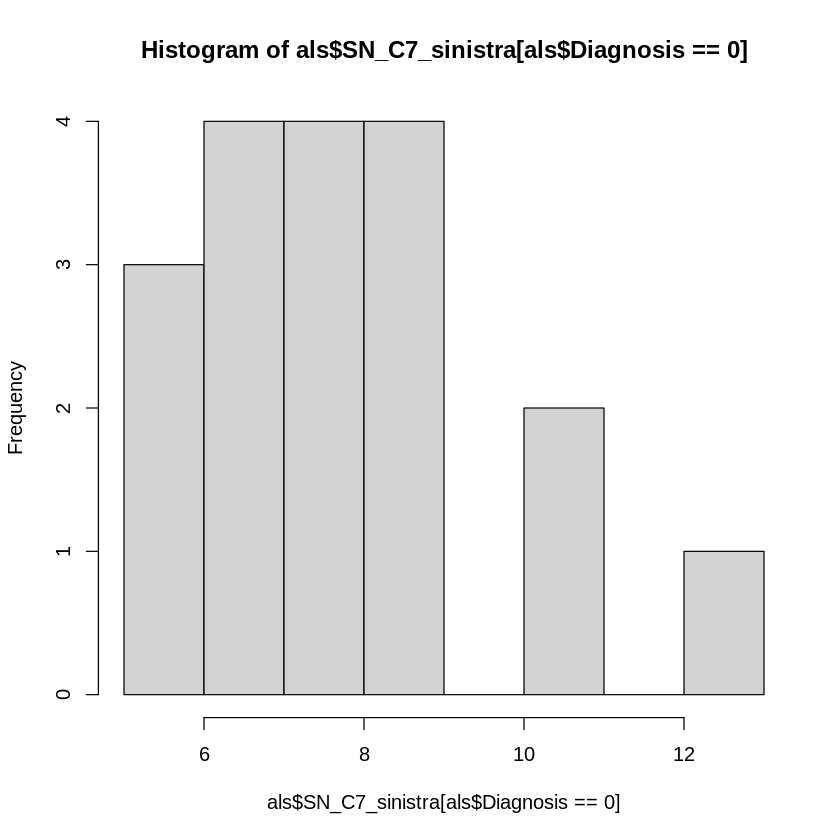

In [71]:
hist(als$SN_C7_sinistra[als$Diagnosis == 0])

In [72]:
independent_vars_down <- c("Ish_dextra","Ish_sinistra","TN_dextra","TN_sinistra","PN_dextra","PN_sinistra")
shapiro_results_down <- lapply(independent_vars_down, function(var) {
  shapiro.test(als[[var]])
})

In [73]:
shapiro_results_down

[[1]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.94311, p-value = 0.06962


[[2]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.9673, p-value = 0.3912


[[3]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.94756, p-value = 0.07398


[[4]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.96002, p-value = 0.2023


[[5]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.8223, p-value = 0.0001102


[[6]]

	Shapiro-Wilk normality test

data:  als[[var]]
W = 0.88008, p-value = 0.001685



In [74]:
ks_results <- lapply(independent_vars, function(var) {
  ks.test(als[[var]], "pnorm", mean = mean(als[[var]], na.rm = TRUE), sd = sd(als[[var]], na.rm = TRUE))
})
ks_results

Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var

[[1]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.13703, p-value = 0.4404
alternative hypothesis: two-sided


[[2]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.13615, p-value = 0.4818
alternative hypothesis: two-sided


[[3]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.16749, p-value = 0.1693
alternative hypothesis: two-sided


[[4]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.15886, p-value = 0.2279
alternative hypothesis: two-sided


[[5]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.157, p-value = 0.3061
alternative hypothesis: two-sided


[[6]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.15093, p-value = 0.3367
alternative hypothesis: two-sided


[[7]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.17167, p-value = 0.1253
alternative hypothesis: two-sided


[[8]]

	Asymptotic one-sample

In [75]:
mean(als$UN2_dextra[als$Diagnosis == 1],na.rm = TRUE)

[1] 8.111111

In [76]:
mean(als$UN2_dextra[als$Diagnosis == 0],na.rm = TRUE)

[1] 8.05

In [77]:
sd(als$UN2_dextra[als$Diagnosis == 1],na.rm = TRUE)

[1] 2.325996

In [78]:
sd(als$UN2_dextra[als$Diagnosis == 0],na.rm = TRUE)

[1] 1.700619

Warning message in plot.window(xlim, ylim, "", ...):
“"na.rm" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"na.rm" is not a graphical parameter”
Warning message in axis(1, ...):
“"na.rm" is not a graphical parameter”
Warning message in axis(2, at = yt, ...):
“"na.rm" is not a graphical parameter”


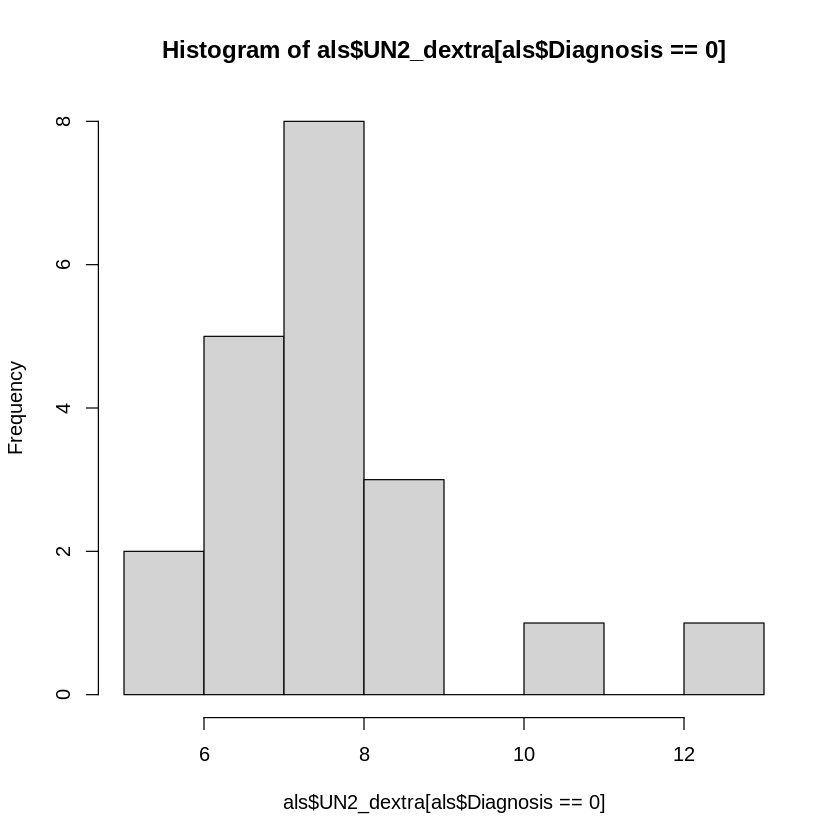

In [79]:
hist(als$UN2_dextra[als$Diagnosis == 0],na.rm = TRUE)

Warning message in plot.window(xlim, ylim, "", ...):
“"na.rm" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"na.rm" is not a graphical parameter”
Warning message in axis(1, ...):
“"na.rm" is not a graphical parameter”
Warning message in axis(2, at = yt, ...):
“"na.rm" is not a graphical parameter”


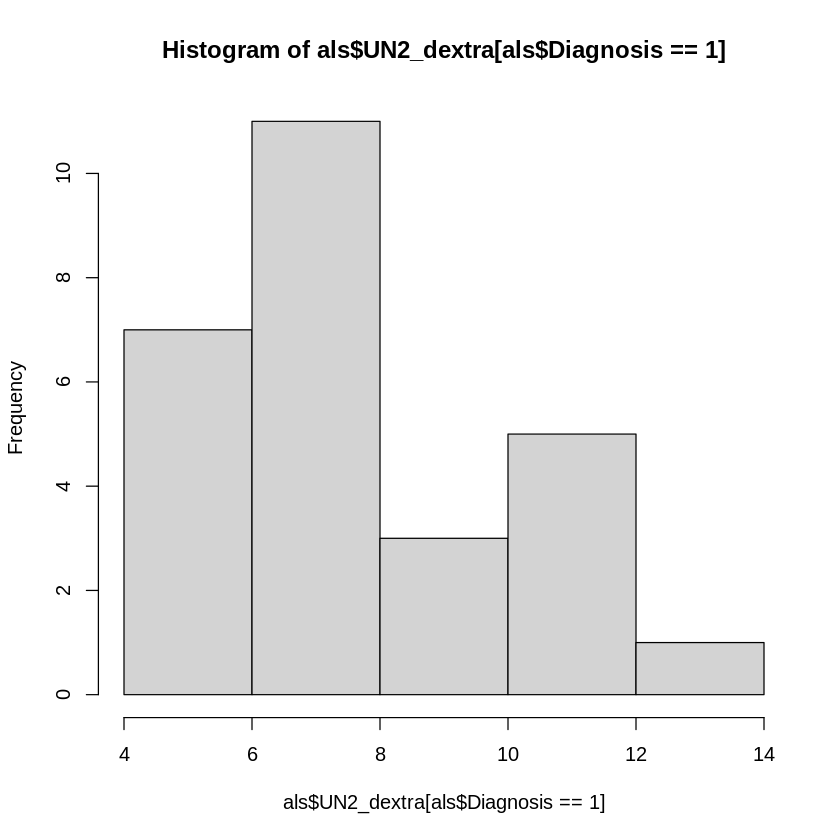

In [80]:
hist(als$UN2_dextra[als$Diagnosis == 1],na.rm = TRUE)

In [81]:
independent_vars_down <- c("Ish_dextra","Ish_sinistra","TN_dextra","TN_sinistra","PN_dextra","PN_sinistra")
ks_results <- lapply(independent_vars_down, function(var) {
  ks.test(als[[var]], "pnorm", mean = mean(als[[var]], na.rm = TRUE), sd = sd(als[[var]], na.rm = TRUE))
})
ks_results

Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”
Warning message in ks.test.default(als[[var]], "pnorm", mean = mean(als[[var]], :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


[[1]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.12361, p-value = 0.6587
alternative hypothesis: two-sided


[[2]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.1018, p-value = 0.8726
alternative hypothesis: two-sided


[[3]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.11384, p-value = 0.7083
alternative hypothesis: two-sided


[[4]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.11311, p-value = 0.7311
alternative hypothesis: two-sided


[[5]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.2158, p-value = 0.1015
alternative hypothesis: two-sided


[[6]]

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  als[[var]]
D = 0.1939, p-value = 0.1672
alternative hypothesis: two-sided



Warning message:
“Removed 9 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


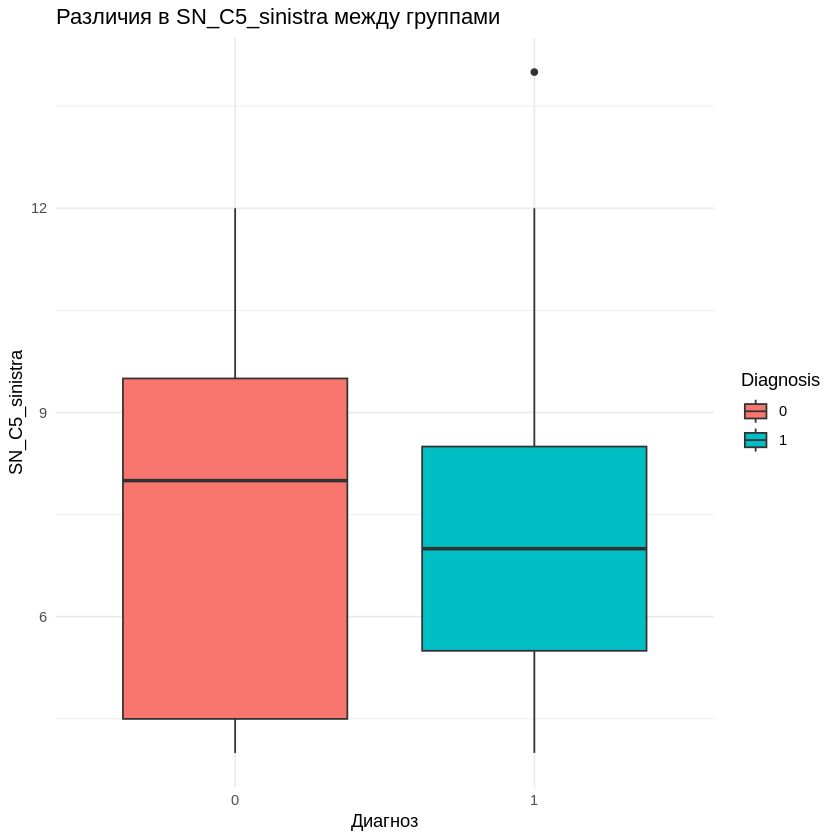

In [82]:
library(ggplot2)

ggplot(als, aes(x = Diagnosis, y = SN_C5_sinistra, fill = Diagnosis)) +
  geom_boxplot() +
  labs(title = "Различия в SN_C5_sinistra между группами",
       x = "Диагноз",
       y = "SN_C5_sinistra") +
  theme_minimal()

In [83]:
write.csv(als, "als.xlsx", row.names = FALSE)

In [84]:
mean(als$Age[als$Diagnosis == 0])

[1] 43.4

In [85]:
sd(als$Age[als$Diagnosis == 0])

[1] 17.0615

In [86]:
mean(als$Age[als$Diagnosis == 1])

[1] 49.7037

In [87]:
sd(als$Age[als$Diagnosis == 1])

[1] 13.96648

In [96]:
sum(als$Sex == 'female'& als$Diagnosis == 0)

[1] 10

In [93]:
sum(als$Sex == 'male' & als$Diagnosis == 0)

[1] 10

In [94]:
sum(als$Sex == 'male' & als$Diagnosis == 1)

[1] 15

In [95]:
sum(als$Sex == 'female' & als$Diagnosis == 1)

[1] 12